#*Regresión lineal múltiple*

Es un modelo matemático que intenta reproducir la relación de dependencia que existe entre una variable dependiente/respuesta y n varibales independientes/explicativas.

## Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Datos

In [ ]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
ccaa = 'desigualdad_ccaa.xlsx'
data = pd.read_excel(ccaa, sheet_name='Datos', header = 0)

print (data.head(6))

Saving desigualdad_ccaa.xlsx to desigualdad_ccaa.xlsx
                          CCAA  PIBpc  Rmedper  ...  Empint  Empweb  Empsoc
0                    Andalucía  19633     9160  ...    98.2    71.5    54.3
1                       Aragón  28727    12300  ...    98.3    85.4    64.7
2      Asturias, Principado de  23299    12523  ...    98.1    81.6    61.3
3               Balears, Illes  28213    12410  ...    97.6    81.4    73.0
4                     Canarias  21244     9487  ...    97.8    67.8    62.8
5                    Cantabria  24383    12205  ...    98.6    72.7    65.9

[6 rows x 50 columns]


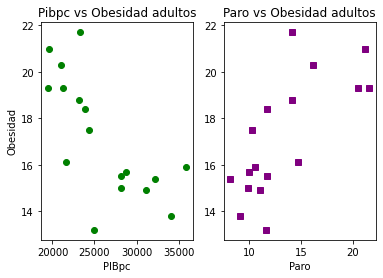

In [ ]:
#Gráfico
x1 = data['PIBpc']
x2 = data['Paro']
y = data['Obemay']
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x1,y,'o', color='green')
ax1.set_title('Pibpc vs Obesidad adultos')
ax1.set_xlabel('PIBpc')
ax1.set_ylabel('Obesidad')
ax2.plot(x2,y,'s', color='purple')
ax2.set_title('Paro vs Obesidad adultos')
ax2.set_xlabel('Paro')


fig.show()

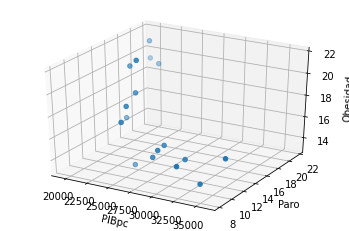

In [ ]:
# Grafico 3d

#fig = plt.figure()

ax=plt.axes(projection='3d')

ax.set_xlabel('PIBpc')
ax.set_ylabel('Paro')
ax.set_zlabel('Obesidad')
ax.scatter(x1,x2,y);

## Ajuste del modelo

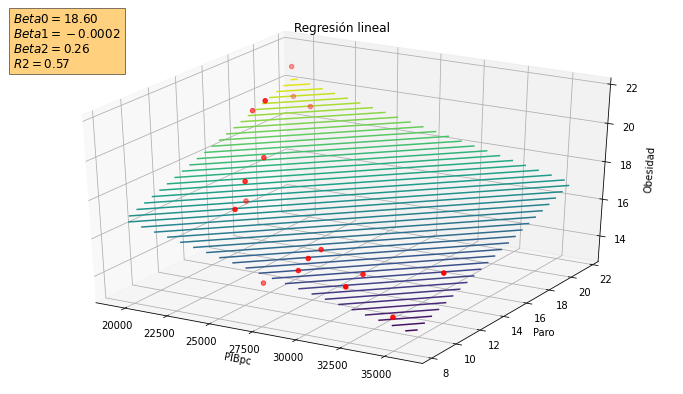

In [ ]:
from sklearn.linear_model import LinearRegression

X=np.stack((x1,x2),axis=1) # Dataset variables independientes

reg =LinearRegression()
reg.fit(X,y) # ajuste del modelo

b0=round(reg.intercept_,2) 
b1=round(reg.coef_[0],4) 
b2=round(reg.coef_[1],2) 
r2=round(reg.score(X, y),2) 

# Grafico del plano de regresión
x1p=np.linspace(min(x1),max(x1),50)
x2p=np.linspace(min(x2),max(x2),50)
P1, P2 = np.meshgrid(x1p, x2p)
def f(x1, x2):
    return b0+b1*x1+b2*x2
Y = f(P1, P2)
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.contour3D(P1, P2, Y, 50)
ax.set_xlabel('PIBpc')
ax.set_ylabel('Paro')
ax.set_zlabel('Obesidad')

# Gráfico de la nube de puntos
ax.scatter(x1,x2,y, color='red');

#Para insertar la cajita con información adicional
textstr = '\n'.join((
    r'$Beta0=%.2f$' % (b0, ),
    r'$Beta1=%.4f$' % (b1, ),
    r'$Beta2=%.2f$' % (b2, ),
    r'$R2=%.2f$' % (r2, )))
ax.text(21000,0,27, textstr, fontsize = 12, bbox=dict(facecolor='orange', alpha=0.5))

ax.set_title('Regresión lineal')
fig.show()

